In [1]:
import signac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scienceplots

#plt.style.use(['science','ieee'])

In [2]:
bond_project = signac.get_project("../../msibi-flow/bond-flow/")
angle_project = signac.get_project("../../msibi-flow/angle-flow/")
pair_project = signac.get_project("../../msibi-flow/pair-flow/")

# Bond Results

# Angle Results

# Pair MSIBI Results

(-2.0, 10.0)

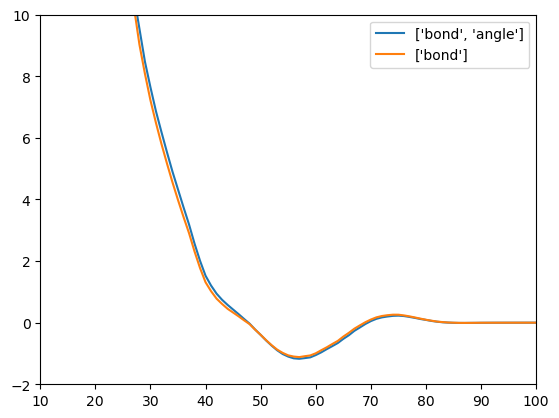

In [3]:
for job in pair_project:
    pot_history = np.load(job.fn("A-A_potential_history.npy"))
    final_pot = pot_history[-1]
    plt.plot(final_pot, label=job.sp.nlist_exclusions)

plt.legend()
plt.xlim(10, 100)
plt.ylim(-2, 10)

In [ ]:
plt.plot(final_pot)

In [ ]:
job.sp